# Group 5

In [1]:
# Import section
import pandas as pd
import numpy as np
import zipfile
import requests
import seaborn as sns
from io import BytesIO

## Section II Kei's code ==start==

In [2]:
# Provided data source
# Historic Canadian Inflation data https://www.bankofcanada.ca/rates/indicators/capacity-and-inflation-pressures/inflation/
# Historic Canadian Interest rate data https://www.bankofcanada.ca/rates/interest-rates/canadian-interest-rates/
# Historic Canadian Immigration rate data https://www12.statcan.gc.ca/census-recensement/2021/as-sa/fogs-spg/page.cfm?topic=9&lang=E&dguid=2021A000011124

## These datasets are not currently used
#TODO:Delete if unused

In [3]:
# Loading data into DataFram 
result_rental_rates = requests.get("https://www150.statcan.gc.ca/n1/tbl/csv/34100133-eng.zip")
result_mortgage_rates = requests.get("https://www150.statcan.gc.ca/n1/tbl/csv/10100006-eng.zip")
result_home_prices = requests.get("https://www150.statcan.gc.ca/n1/tbl/csv/46100062-eng.zip")

with zipfile.ZipFile(BytesIO(result_rental_rates.content)) as zip_file:
    # Extract the file by name
    csv_file = '34100133.csv'
    with zip_file.open(csv_file) as csv_file_opened:
        rental_rates_df = pd.read_csv(csv_file_opened, header=0, sep=',', quotechar='"')
        
with zipfile.ZipFile(BytesIO(result_mortgage_rates.content)) as zip_file:
    # Extract the file by name
    csv_file = '10100006.csv'
    with zip_file.open(csv_file) as csv_file_opened:
        mortgage_rates_df = pd.read_csv(csv_file_opened, header=0, sep=',', quotechar='"')
        
with zipfile.ZipFile(BytesIO(result_home_prices.content)) as zip_file:
    # Extract the file by name
    csv_file = '46100062.csv'
    with zip_file.open(csv_file) as csv_file_opened:
        home_prices_df = pd.read_csv(csv_file_opened, header=0, sep=',', quotechar='"')        

C:\Users\romai\AppData\Local\Temp\ipykernel_20940\965734646.py:10: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  rental_rates_df = pd.read_csv(csv_file_opened, header=0, sep=',', quotechar='"')


KeyboardInterrupt: 

In [ ]:
rental_rates_df.head()

In [ ]:
mortgage_rates_df.head()

In [ ]:
home_prices_df.head()

--- 

Column
    [0] Column
        [0] Select(name='Area', options=['Area 1', 'Area 2'], value='Area 1')
        [1] Select(name='Property', options=['Property A', ...], value='Property A')
    [1] Row
        [0] Str(None, name='interactive00133')

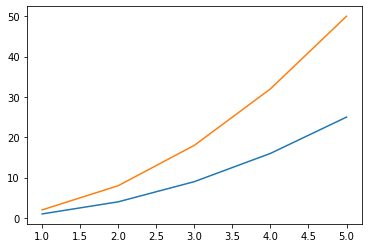

In [13]:
import panel as pn
from panel import widgets
pn.extension()
import matplotlib.pyplot as plt

# Create some data
x = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]
y2 = [2, 8, 18, 32, 50]

# Create a figure and axis
fig, ax = plt.subplots()
line1, = ax.plot(x, y1)
line2, = ax.plot(x, y2)

# Create the drop-down menus
area_select = pn.widgets.Select(name='Area', options=['Area 1', 'Area 2'])
property_select = pn.widgets.Select(name='Property', options=['Property A', 'Property B'])

# Define the function to update the line data when the menus are changed
def update(area, property):
    if area == 'Area 1':
        if property == 'Property A':
            line1.set_ydata(y1)
            line2.set_ydata(y2)
        else:
            line1.set_ydata(y2)
            line2.set_ydata(y1)
    else:
        if property == 'Property A':
            line1.set_ydata(y2)
            line2.set_ydata(y1)
        else:
            line1.set_ydata(y1)
            line2.set_ydata(y2)
    fig.canvas.draw_idle()

# Create the interactive panel
pn.interact(update, area=area_select, property=property_select)

In [12]:
import panel as pn

# Create the drop-down menu
options = ['Option A', 'Option B', 'Option C']
multi_select = pn.widgets.MultiSelect(name='Select multiple options', options=options)

# Create the function that will be called when the selection changes
def update(values):
    print(values)

# Create the interactive panel
pn.interact(update, values=multi_select)

[]


Column
    [0] Column
        [0] MultiSelect(name='Select multiple options', options=['Option A', 'Option B', ...])
    [1] Row
        [0] Str(None, name='interactive00122')

In [14]:
# https://stats.crea.ca/en-CA/ Data set from CREA website
# https://www.crea.ca/housing-market-stats/mls-home-price-index/ -- What HPI stands for 

# Load excel workbook with multiple worksheets into one dataframe
# When loading insert column with worksheet tab name as area_name
xlsx_file = 'Resources/Seasonally_Adjusted.xlsx'
dfs = pd.read_excel(xlsx_file, sheet_name=None)

# Create an empty list to store the dataframes
df_list = []

# Iterate through each worksheet
for sheet_name, df in dfs.items():
    # Add a new column to the dataframe with the worksheet name
    df['area_name'] = sheet_name
    # Append the dataframe to the list
    df_list.append(df)

# Concatenate all dataframes into a single dataframe
real_estate_canada_df = pd.concat(df_list)

NameError: name 'pd' is not defined

In [ ]:
real_estate_canada_df.head()

In [ ]:
# This will extract area name as unique
list_of_areas = real_estate_canada_df["area_name"].unique()

In [ ]:
# Make another dataframe that has only 2022 data
real_estate_2022_df = real_estate_canada_df.loc[real_estate_canada_df['Date'] == '2022-12-01'].drop(columns=['Composite_HPI_SA', 'Single_Family_HPI_SA','One_Storey_HPI_SA','Two_Storey_HPI_SA','Townhouse_HPI_SA','Apartment_HPI_SA'])

In [ ]:
real_estate_2022_df.head()

In [ ]:
# Organize read_estate_2022_df
real_estate_df = real_estate_canada_df.loc[real_estate_canada_df['area_name'] == 'AGGREGATE'].drop(columns=['Composite_HPI_SA', 'Single_Family_HPI_SA','One_Storey_HPI_SA','Two_Storey_HPI_SA','Townhouse_HPI_SA','Apartment_HPI_SA'])
real_estate_df = real_estate_df.rename(columns={'Date':'date'}).drop(columns=['area_name'])

# Keep data between 2014-01-01 to 2021-12-01
selected_dates = (real_estate_df['date'] > '2014-01-01') & (real_estate_df['date'] < '2021-12-01')
real_estate_df = real_estate_df[selected_dates]

# Keep only December data
real_estate_df = real_estate_df[real_estate_df['date'].dt.month == 12]

# Change date portion from yyyy-mm-dd to yyyy
real_estate_df['date'] = real_estate_df['date'].dt.year

In [ ]:
real_estate_df

In [ ]:
# Calculate annual percentage
real_estate_pct_change = real_estate_df.iloc[:, 1:].pct_change()
real_estate_pct_change.insert(0,'date',real_estate_df['date'])
real_estate_pct_change

In [4]:
# Load Interest rate
canada_int_rate_df = pd.read_csv("Resources/Bank_Canada_rate.csv", skiprows=11)
canada_int_rate_df = canada_int_rate_df.rename(columns={'V122530':'canada_int_rate','Date':'date'})

In [5]:
print(canada_int_rate_df.columns)

Index(['date', 'canada_int_rate'], dtype='object')


In [ ]:
# Organize the data
# Set datetime format to date
canada_int_rate_df['date'] = pd.to_datetime(canada_int_rate_df['date'])

# Keep data between 2014-01-01 to 2021-12-01
selected_dates = (canada_int_rate_df['date'] > '2014-01') & (canada_int_rate_df['date'] < '2021-12')
canada_int_rate_df = canada_int_rate_df[selected_dates]

# Keep only December data
canada_int_rate_df = canada_int_rate_df[canada_int_rate_df['date'].dt.month == 12]

# Change date portion from yyyy-mm-dd to yyyy
canada_int_rate_df['date'] = canada_int_rate_df['date'].dt.year

In [ ]:
canada_int_rate_df

In [ ]:
# Load Inflation rate
# df = pd.read_csv('some_data.csv', usecols = ['col1','col2'], low_memory = True)
canada_inf_rate_df = pd.read_csv("Resources/INDINF_CPI.csv", skiprows=20, usecols = ['date','INDINF_CPI_COMMON_Q'], low_memory = True)
canada_inf_rate_df = canada_inf_rate_df.rename(columns={'INDINF_CPI_COMMON_Q':'canada_inf_rate'})

In [ ]:
# Organize data
# Keep data between 2014-01-01 to 2021-12-01
selected_dates = (canada_inf_rate_df['date'].str[:4] >= '2014') & (canada_inf_rate_df['date'].str[:4] <= '2021')
canada_inf_rate_df = canada_inf_rate_df[selected_dates]

# Keep only December data
selected_dates = canada_inf_rate_df['date'].str[-2:] == 'Q4'
canada_inf_rate_df = canada_inf_rate_df[selected_dates]

# Change date portion from yyyy-mm-dd to yyyy
canada_inf_rate_df['date'] = canada_inf_rate_df['date'].str[:-2]

In [ ]:
canada_inf_rate_df

In [ ]:
# Load Immigration rate
canada_imm_rate_df = pd.read_csv("Resources/Immigration_rate.csv", skiprows=2, usecols = ['Year','Percentage (%)'], nrows=43, low_memory = True)
canada_imm_rate_df = canada_imm_rate_df.rename(columns={'Percentage (%)':'canada_imm_rate','Year':'date'})
canada_imm_rate_df

In [ ]:
# Organize data
# Organize data keep record from 2014 to 2021
canada_imm_rate_df = canada_imm_rate_df.loc[(canada_imm_rate_df['date'] > 2014) & (canada_imm_rate_df['date'] < 2021)]

In [ ]:
canada_imm_rate_df

In [ ]:
# Concatinate all the dataframe
#real_estate_pct_change.set_index('date')
#canada_int_rate_df.set_index('date')
#canada_inf_rate_df.set_index('date')
#canada_imm_rate_df.set_index('date')
display(real_estate_pct_change['date'].dtypes)
display(canada_inf_rate_df['date'].dtypes)
display(canada_inf_rate_df['date'].dtypes)
display(canada_imm_rate_df['date'].dtypes)

# Change the data type
canada_int_rate_df['date'] = canada_int_rate_df['date'].astype('int64')
canada_inf_rate_df['date'] = canada_inf_rate_df['date'].astype('int64')

combined_df = real_estate_pct_change.merge(canada_int_rate_df, on='date', how='inner').merge(canada_inf_rate_df, on='date', how='inner').merge(canada_imm_rate_df, on='date', how='inner')
#combined_df = pd.concat([real_estate_pct_change,canada_int_rate_df,canada_inf_rate_df,canada_imm_rate_df], axis="columns", join="inner")
combined_df.head()

In [ ]:
# Get corelationship
correlation = combined_df.corr()
correlation

In [ ]:
# Show the heatmap
sns.heatmap(correlation, annot=True, cmap="YlGnBu")

In [ ]:
real_estate_2022_bc_df.head()

In [ ]:
# pip install geopy -- Need to install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

# Extract the location column
locations = real_estate_2022_df["area_name"] # Set dataframe

# Get the coordinates for each location
coordinates = []
for location in locations:
    try:
        location_obj = geolocator.geocode(location)
        coordinates.append((location, location_obj.latitude, location_obj.longitude))
    except:
        print(f"{location} not found")



In [ ]:
# Create a new dataframe with location names and coordinates
# coordinates_df = pd.DataFrame(coordinates, columns=['location', 'latitude', 'longitude'])
coordinates_df = pd.DataFrame(coordinates, columns=['area_name', 'latitude', 'longitude'])

coordinates_df.head()
# Join the new dataframe with the original dataframe on the location column
# real_estate_2022_bc_df = real_estate_2022_bc_df.merge(coordinates_df, on='location', how='left') # Add geolocation to the dataframe
real_estate_2022_df = real_estate_2022_df.merge(coordinates_df, on='area_name', how='left') # Add geolocation to the dataframe

In [ ]:
real_estate_2022_df.head()

In [ ]:
print(real_estate_2022_df.loc[real_estate_2022_df['latitude'] < 0])

In [ ]:
#temp = real_estate_2022_df.loc[df['area_name'] == 'VICTORIA', 'latitude'].values
#real_estate_2022_df.loc[real_estate_2022_df['area_name'] == 'VICTORIA', 'latitude'] = real_estate_2022_df.loc[real_estate_2022_df['area_name'] == 'VICTORIA', 'longitude'].values
#real_estate_2022_df.loc[real_estate_2022_df['area_name'] == 'VICTORIA', 'longitude'] = temp

#temp = real_estate_2022_df.loc[real_estate_2022_df['area_name'] == 'VICTORIA', 'latitude'].values
#real_estate_2022_df.loc[real_estate_2022_df['area_name'] == 'VICTORIA', 'latitude'] = real_estate_2022_df.loc[real_estate_2022_df['area_name'] == 'VICTORIA', 'longitude'].values
#real_estate_2022_df.loc[real_estate_2022_df['area_name'] == 'VICTORIA', 'longitude'] = temp

#temp = real_estate_2022_df.loc[real_estate_2022_df['area_name'] == 'GREATER_TORONTO', 'latitude'].values
#real_estate_2022_df.loc[real_estate_2022_df['area_name'] == 'GREATER_TORONTO', 'latitude'] = real_estate_2022_df.loc[real_estate_2022_df['area_name'] == 'GREATER_TORONTO', 'longitude'].values
#real_estate_2022_df.loc[real_estate_2022_df['area_name'] == 'GREATER_TORONTO', 'longitude'] = temp


In [ ]:
print(real_estate_2022_df.loc[real_estate_2022_df['area_name'] == 'VICTORIA'])

In [ ]:
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'VICTORIA']

In [ ]:
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'GREATER_TORONTO']

In [ ]:
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'AGGREGATE']

In [ ]:
# Data cleaning: Remove records whose geo coordination is not correct or no data.
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'BANCROFT_AND_AREA']
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'GUELPH_AND_DISTRICT']
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'QUINTE_AND_DISTRICT']
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'ST_JOHNS_NL']

In [ ]:
# Data cleaning: Remove records whose geo coordination is not correct or no data.
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'QUEBEC_CMA']
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'MONTREAL_CMA']
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'LONDON_ST_THOMAS']
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'BARRIE_AND_DISTRICT']
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'KINGSTON_AND_AREA']
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'CAMBRIDGE']

In [ ]:
# Data cleaning: Remove records whose geo coordination is not correct or no data.
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'HAMILTON_BURLINGTON']
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'NORTHUMBERLAND_HILLS']
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'LOWER_MAINLAND']

In [ ]:
real_estate_2022_df = real_estate_2022_df[real_estate_2022_df.area_name != 'HAMILTON_BURLINGTON']

In [ ]:
print(real_estate_2022_df['Composite_Benchmark_SA'].max())
print(real_estate_2022_df['Composite_Benchmark_SA'].min())

In [ ]:
real_estate_2022_df.sort_values('latitude')

In [ ]:
import hvplot.pandas
from pathlib import Path
from panel.interact import interact
from ipywidgets import interact, widgets
import warnings
from shapely.errors import ShapelyDeprecationWarning

In [ ]:
def my_function(x):
    print(x)

interact(my_function, x=widgets.IntSlider(min=0, max=1500000, step=1, value=0))

In [ ]:
# Prepare slider for 
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighbourhood
# Make dropdown menu with neighbourhood
#list_of_neigbourhood = prices_by_year_by_neighbourhood["neighbourhood"].unique()

# This function returns selected home price as int
#def my_real_estate_price(price):
#    print(price)
#    return price 

#interact(my_real_estate_price, price=widgets.IntSlider(min=200000, max=1500000, step=1, value=0))

# This function create a list for dropdown menu and returns plot 
def real_estate_canada(real_estate_price):
    selected_real_estate_2022_df = real_estate_2022_df.loc[real_estate_2022_df["Composite_Benchmark_SA"] < real_estate_price]

    if selected_real_estate_2022_df['Composite_Benchmark_SA'].nunique() > 10:
        color = 'Composite_Benchmark_SA'
    else:
        color = None
    
    # Plot prices_square_foot_by_year with chosen neighbourhood.
    # Inclued labels for the x- and y-axes, and a title.
    selected_home_price_plot = selected_real_estate_2022_df.hvplot.points('longitude','latitude',xlabel='Longitude', ylabel='Latitude',color=color,cmap='magma',geo=True,size=real_estate_2022_df['Composite_Benchmark_SA']/1000,hover_cols='area_name',tiles='OSM',frame_width=1500, frame_height=1000, 
    title='Average Home price across Canada').opts(yformatter='%.0f')

    
    return selected_home_price_plot

# This will show dropdown menu with plot line
interact(real_estate_canada, real_estate_price=widgets.IntSlider(min=200000, max=1500000, step=1, value=0))

In [ ]:
# This suppresses warning message
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

# Create a plot real estate info across Canada
#real_estate_2022_df.hvplot.points('longitude','latitude',xlabel='Longitude', ylabel='Latitude',geo=True,color='Composite_Benchmark_SA',size=50,hover_cols='area_name',tiles='OSM',frame_width=700, frame_height=500, 
#title='KEI CHAN',zoom=5,extents=[-141.0, 41.67655, -52.63696, 83.23324],).opts(yformatter='%.0f')
real_estate_2022_df.hvplot.points('longitude','latitude',xlabel='Longitude', ylabel='Latitude',cmap='magma',geo=True,color='Composite_Benchmark_SA',size=real_estate_2022_df['Composite_Benchmark_SA']/1000,hover_cols='area_name',tiles='OSM',frame_width=1500, frame_height=1000, 
#real_estate_2022_df.hvplot.points('longitude','latitude',xlabel='Longitude', ylabel='Latitude',cmap='magma',geo=True,color='Composite_Benchmark_SA',size='Composite_Benchmark_SA',hover_cols='area_name',tiles='OSM',frame_width=1500, frame_height=1000, 
title='Average Home price across Canada').opts(yformatter='%.0f')
#real_estate_2022_df.hvplot.points('longitude','latitude',xlabel='Longitude', ylabel='Latitude',geo=True,color='Composite_Benchmark_SA',size='Composite_Benchmark_SA',hover_cols='area_name',tiles='OSM', 


real_estate_2022_df.hvplot.points('longitude','latitude',xlabel='Longitude', ylabel='Latitude',cmap='magma',geo=True,color='Composite_Benchmark_SA',size=real_estate_2022_df['Composite_Benchmark_SA']/1000,hover_cols='area_name',tiles='OSM',frame_width=1500, frame_height=1000, 
title='Average Home price across Canada').opts(yformatter='%.0f')


## Section II Kei's code ==ends==

## Romain's Section begins

In [17]:
# Import libraries 
import math
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# Read the CSV file
canada_int_rate_df = pd.read_csv("canada_int_rate_df.csv")

# Create the bar plot
plt.bar(canada_int_rate_df['Year'], canada_int_rate_df['Interest Rate'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.title('Canada Interest Rates')

# Show the plot
plt.show()

NameError: name 'canada_int_rate_df' is not defined

In [ ]:
def mortgage_affordability(principal, interest_rate, term, monthly_debt_payments, gross_income, credit_score, rent_price):
    # calculate the monthly interest rate
    monthly_rate = interest_rate / 12
    # calculate the number of payments
    payments = term * 12
    # calculate the monthly mortgage payment
    monthly_mortgage_payment = principal * (monthly_rate * math.pow(1 + monthly_rate, payments)) / (math.pow(1 + monthly_rate, payments) - 1)
    # calculate the total monthly debt payments
    total_monthly_debt_payments = monthly_debt_payments + monthly_mortgage_payment
    # calculate the debt-to-income ratio
    dti = total_monthly_debt_payments / (gross_income/12)
    # check if the dti ratio is less than 43% and credit score is above a certain threshold
    if dti < 0.43 and credit_score >= 700:
        return f"Congratulations! You can afford a mortgage of ${principal}."
    else:
        return f"I am sorry, but based on your income, credit score and the loan amount, you do not qualify for this loan but you can rent for ${rent_price} dollars."

# Input variables
principal = float(input("Enter the loan amount: "))
interest_rate = float(input("Enter the annual interest rate (as a decimal): "))
term = int(input("Enter the loan term in years: "))
monthly_debt_payments = float(input("Enter your monthly debt payments: "))
gross_income = float(input("Enter your gross annual income: "))
credit_score = int(input("Enter your credit score: "))
rent_price = float(input("Enter the monthly rent price: "))

# Call the function
result = mortgage_affordability(principal, interest_rate, term, monthly_debt_payments, gross_income, credit_score, rent_price)

# Print the result
print(result)

## Section II

## Section III

## Section IV

## Section V

## Section VI